In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
data = pd.read_csv('adultPrac7.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [170]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [171]:
data.shape

(32561, 15)

In [172]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

target value to classify or predict is income

In [173]:
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [174]:
for i in list(data.columns):
    print(data[f'{i}'].unique(),'--->',i)
    print('\n')

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] ---> age


[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] ---> workclass


[ 77516  83311 215646 ...  34066  84661 257302] ---> fnlwgt


[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] ---> education


[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] ---> education_num


[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] ---> marital_status


[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'


In [175]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [176]:
data[data['workclass'] == ' ?'] = np.NaN

In [177]:
data[data['native_country'] == ' ?'] = np.NaN

In [178]:
data.isna().sum()

age               2392
workclass         2392
fnlwgt            2392
education         2392
education_num     2392
marital_status    2392
occupation        2392
relationship      2392
race              2392
sex               2392
capital_gain      2392
capital_loss      2392
hours_per_week    2392
native_country    2392
income            2392
dtype: int64

In [179]:
categorical = [i for i in list(data.columns) if data[i].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [180]:
numerical = [i for i in list(data.columns) if data[i].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [181]:
for category in categorical:
    data[category].fillna(data[category].mode()[0],inplace=True)
    
for numeric in numerical:
    data[numeric].fillna(data[numeric].mean(),inplace=True)

In [182]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [183]:
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [184]:
data.head(8)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K


In [185]:
X = data.drop(['income'],axis=1)
y = data.income

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [187]:
label_encoder = LabelEncoder()
X_train=X_train.apply(LabelEncoder().fit_transform)
X_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
15282,19,3,7892,1,6,0,14,1,4,1,0,0,39,38
24870,18,3,10060,11,8,4,4,1,4,0,0,0,54,38
18822,21,3,1324,9,13,4,1,1,4,0,0,0,50,38
26404,34,3,5500,11,8,2,12,5,2,0,0,0,39,38
7842,52,5,4218,8,11,2,10,0,4,1,0,59,39,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,27,1,509,12,14,2,4,0,4,1,0,0,39,38
19648,28,3,2957,0,5,4,5,4,4,1,0,0,34,38
9845,6,3,1038,15,9,5,12,3,4,0,0,0,39,38
10799,29,1,11311,10,16,2,4,0,4,1,93,0,45,38


In [188]:
y_train =label_encoder.fit_transform(y_train)
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [189]:
sscalar = StandardScaler()
mmscalar = MinMaxScaler()
for i in list(X_train.columns):
    X_train[i]=mmscalar.fit_transform(X=np.array(X_train[i]).reshape(-1,1))
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
15282,0.263889,0.428571,0.457428,0.066667,0.3750,0.000000,1.000000,0.2,1.0,1.0,0.0,0.000000,0.414894,0.95
24870,0.250000,0.428571,0.583087,0.733333,0.5000,0.666667,0.285714,0.2,1.0,0.0,0.0,0.000000,0.574468,0.95
18822,0.291667,0.428571,0.076740,0.600000,0.8125,0.666667,0.071429,0.2,1.0,0.0,0.0,0.000000,0.531915,0.95
26404,0.472222,0.428571,0.318785,0.733333,0.5000,0.333333,0.857143,1.0,0.5,0.0,0.0,0.000000,0.414894,0.95
7842,0.722222,0.714286,0.244479,0.533333,0.6875,0.333333,0.714286,0.0,1.0,1.0,0.0,0.686047,0.414894,0.95


Label encoding, normalisation on testing data

In [190]:
X_test=X_test.apply(LabelEncoder().fit_transform)
y_test =label_encoder.fit_transform(y_test)

In [191]:
for i in list(X_test.columns):
    X_test[i]=mmscalar.fit_transform(X=np.array(X_test[i]).reshape(-1,1))
# X_test.head()

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,roc_curve,confusion_matrix,accuracy_score

In [203]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [204]:
y_pred=knn_model.predict(X_test)

In [208]:
# knn_model.score(X_test,y_test)

In [209]:
accuracy = accuracy_score(y_test,knn_model.predict(X_test))
print(accuracy)

0.8327959465684016


In [211]:
cmatrix = confusion_matrix(y_test,knn_model.predict(X_test)) 
cmatrix

array([[4459,  525],
       [ 564,  965]], dtype=int64)

Using Naive Bayes Algorithm

In [212]:
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)
y_pred_B = bayes_model.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", y_pred_B)

Actual Value: [0 0 0 ... 1 0 1]
Predicted Value: [0 0 0 ... 1 1 0]


In [213]:
accuracy = accuracy_score(y_test,bayes_model.predict(X_test))
print(accuracy)

0.8263473053892215


In [215]:
cmatrix = confusion_matrix(y_test,bayes_model.predict(X_test)) 
cmatrix

array([[4665,  319],
       [ 812,  717]], dtype=int64)

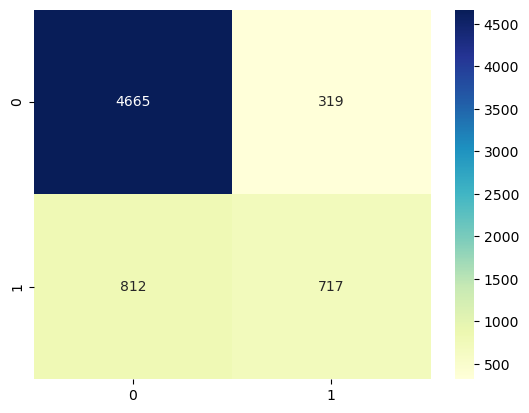

In [226]:
sns.heatmap(cmatrix,annot=True,fmt='d',cmap='YlGnBu')
plt.show()